 <pre>Mohammad Mahdi Razmjoo-400101272 

# Schematic of a p-level QAOA

<img title="a title" alt="Alt text" src="plevel.png">

## MaxCut Problem
The MaxCut problem is a common application of QAOA.

In the MaxCut problem, given a graph with vertices and edges, the goal is to find a partition of the vertices into two groups such that the number of cut edges, or the maximum cut, is maximized.

<img title="a title" alt="Alt text" src="cut.png">

Here, assuming it’s an unweighted graph,

$$  
U_{B_l} = e^{-i\beta_l B} = \prod_{j=1}^n e^{-i\beta_l \sigma_x^j}  
$$  
$$  
U_{C_l} = e^{-i\gamma_l C} = \prod_{\text{edge } (j,k)} e^{-i\gamma_l (1 - \sigma_z^j \sigma_z^k)/2}  
$$

we can illustrate its circuit

<img title="a title" alt="Alt text" src="circuit.png">

In [3]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc
!pip install pylatexenc
from IPython.display import clear_output
clear_output()

In [4]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np

In [5]:
graph = {
    'edges': [(0, 1), (1, 2), (2, 3), (3, 0)],
    'weights': [1, 2, 3, 1]
}

def qaoa_circuit(gamma, beta, graph):
    n = len(graph['weights'])
    qc = QuantumCircuit(n, n)

    qc.h(range(n))

    for edge, weight in zip(graph['edges'], graph['weights']):
        qc.cx(edge[0], edge[1])
        qc.u(2 * gamma * weight, 0, 0, edge[1])
        qc.cx(edge[0], edge[1])

    qc.rx(2 * beta, range(n))

    return qc

def evaluate_qaoa(gamma, beta, graph, n_shots=1000):
    qc = qaoa_circuit(gamma, beta, graph)
    qc.measure(range(len(graph['weights'])), range(len(graph['weights'])))

    aer_sim = Aer.get_backend('aer_simulator')
    transpiled_qc = transpile(qc, aer_sim)

    result = aer_sim.run(transpiled_qc, shots=n_shots).result()
    counts = result.get_counts(qc)

    obj_val = 0
    for bit_string, count in counts.items():
        bit_weight = sum([int(bit) * weight for bit, weight in zip(bit_string, graph['weights'])])
        obj_val += bit_weight * count / n_shots

    return obj_val


def optimize_qaoa(graph, n_shots=1000, n_steps=50):
    gamma = np.random.uniform(0, np.pi, n_steps)
    beta = np.random.uniform(0, np.pi, n_steps)

    for step in range(n_steps):
        obj_val = evaluate_qaoa(gamma[step], beta[step], graph, n_shots=n_shots)
        print(f"Step {step + 1}/{n_steps} - Objective Value: {obj_val}")

    return gamma, beta

gamma_opt, beta_opt = optimize_qaoa(graph)
print(f"Optimal gamma: {gamma_opt[-1]}")
print(f"Optimal beta: {beta_opt[-1]}")

Step 1/50 - Objective Value: 3.5249999999999995
Step 2/50 - Objective Value: 3.368
Step 3/50 - Objective Value: 3.4930000000000003
Step 4/50 - Objective Value: 3.5349999999999997
Step 5/50 - Objective Value: 3.658
Step 6/50 - Objective Value: 3.476
Step 7/50 - Objective Value: 3.3970000000000002
Step 8/50 - Objective Value: 3.456000000000001
Step 9/50 - Objective Value: 3.521
Step 10/50 - Objective Value: 3.5340000000000003
Step 11/50 - Objective Value: 3.5249999999999995
Step 12/50 - Objective Value: 3.6
Step 13/50 - Objective Value: 3.6209999999999996
Step 14/50 - Objective Value: 3.4859999999999998
Step 15/50 - Objective Value: 3.4579999999999997
Step 16/50 - Objective Value: 3.532
Step 17/50 - Objective Value: 3.498
Step 18/50 - Objective Value: 3.5039999999999996
Step 19/50 - Objective Value: 3.464
Step 20/50 - Objective Value: 3.4889999999999994
Step 21/50 - Objective Value: 3.417
Step 22/50 - Objective Value: 3.495
Step 23/50 - Objective Value: 3.513
Step 24/50 - Objective Value

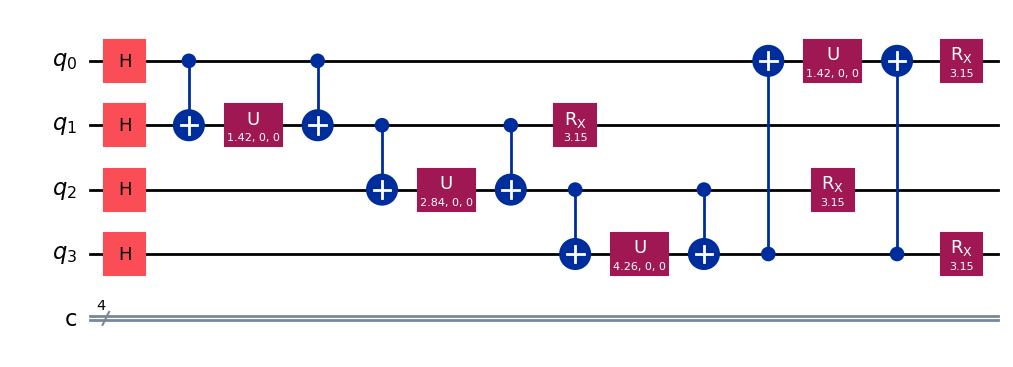

In [6]:
from qiskit.visualization import plot_histogram
qc = qaoa_circuit(gamma=gamma_opt[-1], beta=beta_opt[-1], graph=graph)
qc.draw('mpl')